In [537]:
# 0 Считывание и подотовка данных
import pandas as pd
import missingno as msno
import numpy as np
data = pd.read_csv('telecom_users.csv')
data.dtypes
#Как видно типы данных сответствуют описанию за исключением столбца TotalCharges- он должен быть числовым. Исправим это

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [538]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [520]:
# 1.Описание данных (с расчетом базовых статистик);
data.describe(include=[np.number])#Строим Базовые статистики для числовых данных

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5976.000000
mean,3533.561310,0.161377,32.468760,64.802213,2298.060617
std,2035.705666,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,404.312500
50%,3546.500000,0.000000,29.000000,70.400000,1412.150000
75%,5291.750000,0.000000,56.000000,89.900000,3846.962500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [521]:
data.describe(include=[np.object])
#Базовые статистики для строчных данных. Как видно по строке unique количества уникальных значений 
#соответствует текстовому описанию данных в задании. Тем не менее проверим данные на наличие пропущенных значений

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,9938-PRCVK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [522]:
data.isnull().sum()# Как видно пропущенных значений(кроме TotalCharges) нет. 

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [539]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())#Заменим пропущенные значения в TotalCharges 
#на средние значения

In [524]:
data['Churn'].value_counts()#Как видно процент оттока достаточно высок около четверти. 

No     4399
Yes    1587
Name: Churn, dtype: int64

In [525]:
# 2.Исследование зависимостей и формулирование гипотез;
# Для поиска зависимостей (диарамма Пирсона) для категориальных признаков конверируем данные признаков в классы. 
# Нормализуем числовые данные
# Удалим customerID','Unnamed: 0,

In [540]:
data['gender'] = data['gender'].map({'Female':1,'Male':0}).astype(int)
data['Partner'] = data['Partner'].map({'Yes':1,'No':0}).astype(int)
data['Dependents'] = data['Dependents'].map({'Yes':1,'No':0}).astype(int)
data['PhoneService'] = data['PhoneService'].map({'Yes':1,'No':0}).astype(int)
data['MultipleLines'] = data['MultipleLines'].map({'Yes':2,'No':1,'No phone service':0}).astype(int)
data['InternetService'] = data['InternetService'].map({'DSL':2,'Fiber optic':1,'No':0}).astype(int)
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes':2,'No':1,'No internet service':0}).astype(int)
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes':2,'No':1,'No internet service':0}).astype(int)
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes':2,'No':1,'No internet service':0}).astype(int)
data['TechSupport'] = data['TechSupport'].map({'Yes':2,'No':1,'No internet service':0}).astype(int)
data['StreamingTV'] = data['StreamingTV'].map({'Yes':2,'No':1,'No internet service':0}).astype(int)
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes':2,'No':1,'No internet service':0}).astype(int)
data['Contract'] = data['Contract'].map({'Month-to-month':2,'One year':1,'Two year':0}).astype(int)
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes':1,'No':0}).astype(int)
data['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check':3,'Mailed check':2,'Bank transfer (automatic)':1,'Credit card (automatic)':0}).astype(int)
                                         
data['Churn'] = data['Churn'].map({'Yes':1,'No':0}).astype(int)                                                 
#Нормализуем числовые признаки
data['tenure_sc'] = (data['tenure']-data['tenure'].min())/(data['tenure'].max()-data['tenure'].min())
data['MonthlyCharges_sc'] = (data['MonthlyCharges']-data['MonthlyCharges'].min())/(data['MonthlyCharges'].max()-data['MonthlyCharges'].min())
data['TotalCharges_sc'] = (data['TotalCharges']-data['TotalCharges'].min())/(data['TotalCharges'].max()-data['TotalCharges'].min())



data.drop(['customerID','Unnamed: 0'],axis = 1,inplace=True)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_sc,MonthlyCharges_sc,TotalCharges_sc
0,0,0,1,1,72,1,2,0,0,0,...,0,0,0,0,24.10,1734.65,0,1.000000,0.058209,0.197998
1,1,0,0,0,44,1,1,1,1,2,...,1,2,1,0,88.15,3973.20,0,0.611111,0.695522,0.456312
2,1,1,1,0,38,1,2,1,1,1,...,1,2,1,1,74.95,2869.85,1,0.527778,0.564179,0.328993


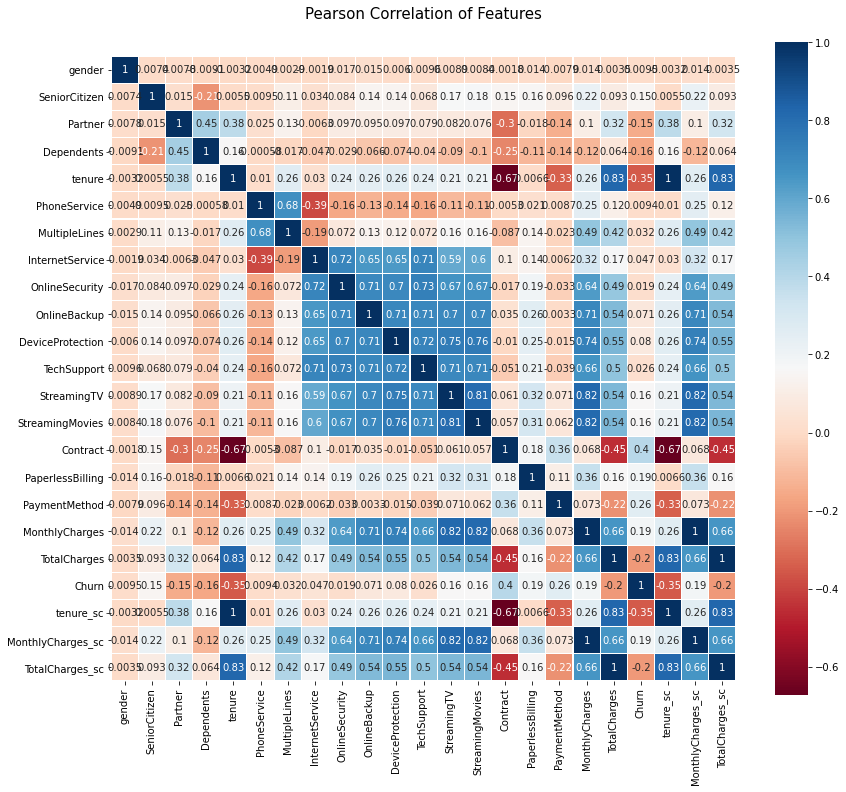

In [541]:
#Построим диарамму пирсона
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [85]:
#2.
#В центре диараммы очевидна область сильной ВЗАИМНОЙ корреляции внутри признаков имеющих отношение к дополнительным сервисам 
#связанных с доступом в интернет.
# Для выявления значимых признаков проведем построение моделей машинного обучения и с их помощью оценим влияние 
# признаков на целевую переменную

In [542]:
#Для корректной работы алгоритмов классификации необходимо преобразовать признаки в бинарные признаки.
#Вот это перечень признаков имеет имеет более чем 2 значений
lfb = ['MultipleLines','InternetService','OnlineSecurity',
       'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for feature in lfb:
    v = pd.get_dummies(data[feature]).rename(columns={0: feature+'0', 1: feature+'1',2:feature+'2', 3:feature+'3'})
    data = pd.concat([data,v],axis =1)
    data.drop(feature,axis = 1,inplace=True)

In [543]:
data.drop(['tenure','TotalCharges','MonthlyCharges'],axis = 1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,tenure_sc,MonthlyCharges_sc,TotalCharges_sc,...,StreamingMovies0,StreamingMovies1,StreamingMovies2,Contract0,Contract1,Contract2,PaymentMethod0,PaymentMethod1,PaymentMethod2,PaymentMethod3
0,0,0,1,1,1,0,0,1.000000,0.058209,0.197998,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,1,0,0.611111,0.695522,0.456312,...,0,1,0,0,0,1,1,0,0,0
2,1,1,1,0,1,1,1,0.527778,0.564179,0.328993,...,0,1,0,0,0,1,0,1,0,0
3,0,0,0,0,1,1,0,0.055556,0.374627,0.025352,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0.027778,0.350249,0.011620,...,0,1,0,0,0,1,0,0,0,1


In [544]:
# 3.
# Мы имеем задачу классификации для машинного обучения. Возьмем в качестве базовых алгоритмов:
# GradientBoostingClassifier, RandomForestClassifier,SVC,LogisticRegression.
# За метрику примем roc_auc_score
# Проведем подбор гиперпараметров по каждому алгоритму
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [545]:
targets = data.Churn
train = data.drop(columns='Churn')
x_train, x_test, y_train, y_test = train_test_split(train, 
                                                    targets,
                                                    test_size=0.3,
                                                    random_state=17)
skf = StratifiedKFold(n_splits=5,shuffle = True ,random_state=17)

In [546]:
#RandomForestClassifier
rfc = RandomForestClassifier(random_state=17)
rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}
clf_rfc = GridSearchCV(rfc, rfc_params,cv = skf)
clf_rfc.fit(x_train,y_train)
clf_rfc.best_params_

{'min_samples_leaf': 3, 'n_estimators': 40}

In [547]:
rfc = RandomForestClassifier(n_estimators=40,min_samples_leaf=3, random_state=1)
probas = rfc.fit(x_train, y_train).predict_proba(x_train)
roc_auc_score(y_train, probas[:, 1])

0.9601517431561845

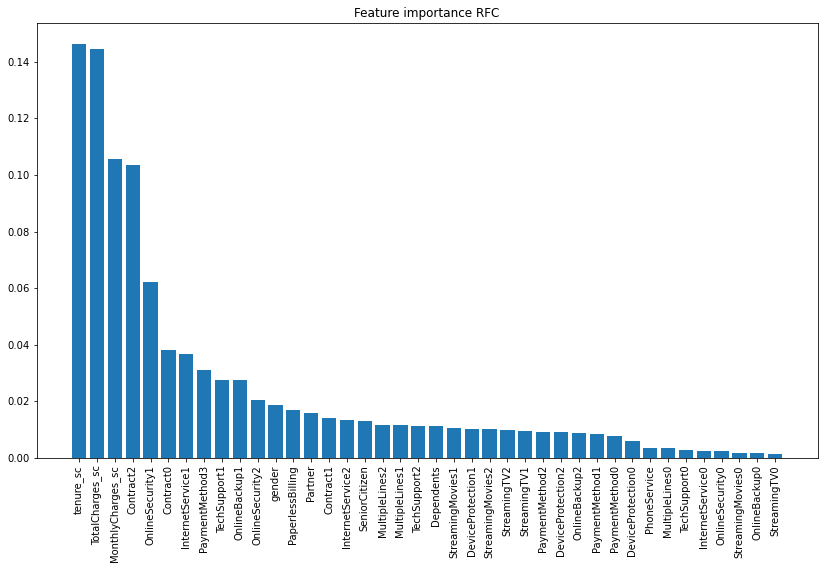

In [552]:
# Посмотрим на значимость фичей
feat_labels = x_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(14,8))
plt.title('Feature importance RFC')
plt.bar(range(x_train.shape[1]),importances[indices],align='center')
plt.xticks(range(x_train.shape[1]),feat_labels[indices],rotation=90)
plt.show()

In [553]:
# GradientBoostingClassifier
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} 
targets = data.Churn
train = data.drop(columns=['Churn'])
x_train, x_test, y_train, y_test = train_test_split(train, 
                                                    targets,
                                                    test_size=0.3,
                                                    random_state=17)
gbc = GradientBoostingClassifier(random_state=17)
clf_gbc = GridSearchCV(gbc, gbc_params,cv = skf)
clf_gbc.fit(x_train,y_train)
clf_gbc.best_params_

{'learning_rate': 0.1}

In [554]:
gbc = GradientBoostingClassifier(learning_rate=0.1,random_state=17)
probas = gbc.fit(x_train, y_train).predict_proba(x_train)
roc_auc_score(y_train, probas[:, 1])

0.88690585240696

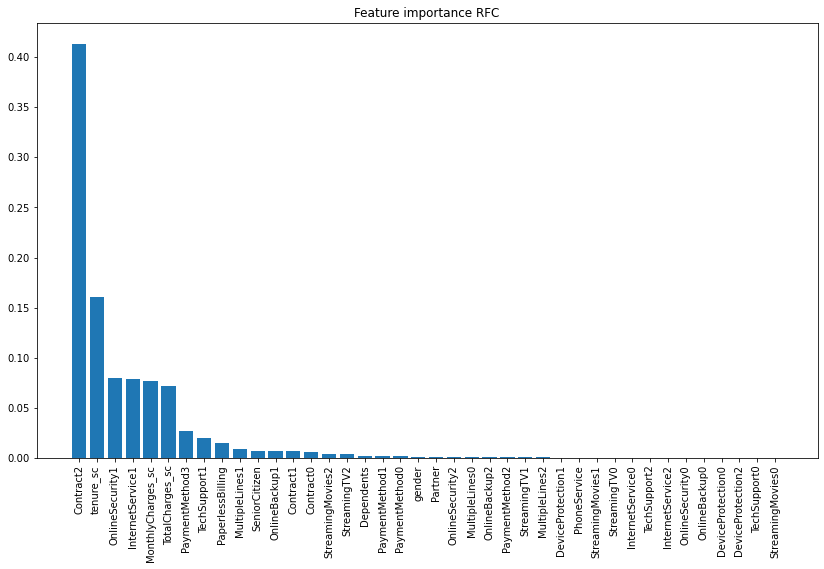

In [555]:
# Посмотрим на значимость фичей
feat_labels = x_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range(x_train.shape[1]):
#    print("%2d) %-*s %f" %(f+1,30,
#                           feat_labels[indices[f]],
#                           importances[indices[f]]))
plt.figure(figsize=(14,8))
plt.title('Feature importance RFC')
plt.bar(range(x_train.shape[1]),importances[indices],align='center')
plt.xticks(range(x_train.shape[1]),feat_labels[indices],rotation=90)
plt.show()

In [556]:
#LogisticRegression
lr = LogisticRegression(random_state=17)
lr_params = {'C': np.arange(0.5, 1, 0.1)}
clf_lr = GridSearchCV(lr, lr_params,cv = skf)
clf_lr.fit(x_train,y_train)
clf_lr.best_params_

{'C': 0.7999999999999999}

In [557]:
lr = LogisticRegression(C = 0.8,random_state=17)
probas = lr.fit(x_train, y_train).predict_proba(x_train)
roc_auc_score(y_train, probas[:, 1])

0.8489398680289794

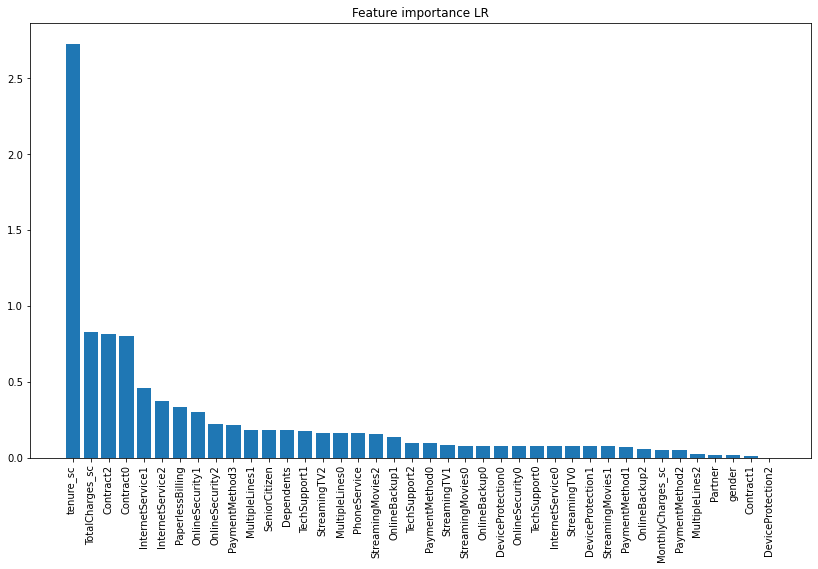

In [559]:
# Посмотрим на значимость фичей
feat_labels = x_train.columns
importances = np.absolute(np.squeeze(lr.coef_))
indices = np.argsort(importances)[::-1]
indices = indices
#for f in range(x_train.shape[1]):
#    print("%2d) %-*s %f" %(f+1,30,
#                           feat_labels[indices[f]],
#                           importances[indices[f]]))
plt.figure(figsize=(14,8))      
plt.title('Feature importance LR')
plt.bar(range(x_train.shape[1]),importances[indices],align='center')
plt.xticks(range(x_train.shape[1]),feat_labels[indices],rotation=90)
plt.show()

In [567]:
svc = SVC(random_state=17)
svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}
clf_svc = GridSearchCV(svc, svc_params,cv = skf)
clf_svc.fit(x_train,y_train)
clf_svc.best_params_

{'C': 0.5000000000000001, 'kernel': 'rbf'}

In [568]:
svc = SVC(C = 0.5, kernel = 'rbf',random_state=17,probability=True)
probas = svc.fit(x_train, y_train).predict_proba(x_train)
roc_auc_score(y_train, probas[:, 1])

0.8549063494685767

In [ ]:
# 4.
# Результаты: RandomForestClassifier - 0.9601517431561845
#             GradientBoostingClassifier - 0.88690585240696
#             LogisticRegression - 0.8489398680289794
#             SVC - 0.8549063494685767
# RandomForestClassifier дал наилучший результат 0.9601517431561845. 
# С точки зрения анализа значимсти фичей можно сказать что для всех алгоритмов значимыми фичами являются:
# Contract,tenure,TotalCharges,MonthlyCharges,PaymentMethod,Onlinesequrity
